Importing the key libraries

In [1]:
import torch 
from matplotlib import pyplot as plt #For Rendering 
import numpy as np #For Data transformation 
import cv2 #Open-Cv

Loading the Model 

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s') #To get a pre trained model from the torch hub
#Using the lightest model available to keep everything light for the raspberry pi

d:\DriverBehaviorAnalysisAndViolationDetection\venv\Lib\site-packages\torch\hub.py:294: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\Admin/.cache\torch\hub\master.zip
YOLOv5  2024-2-25 Python-3.11.7 torch-2.2.1+cpu CPU

100%|██████████| 14.1M/14.1M [00:02<00:00, 5.79MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding Auto

In [3]:
#Run this to know the model structure
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

Making Base Line Detections - Testing the Model with an image

In [21]:
#Used to pass in urls of images to check the model
img = 'https://th.bing.com/th/id/OIP.gzkVQWVgkZwhYJXS_0J9fwHaFW?rs=1&pid=ImgDetMain'

In [22]:
#Passing an image to the model to test.
results = model(img)
results.print()

image 1/1: 342x474 1 person, 19 cars
Speed: 1356.2ms pre-process, 1477.1ms inference, 6.0ms NMS per image at shape (1, 3, 480, 640)


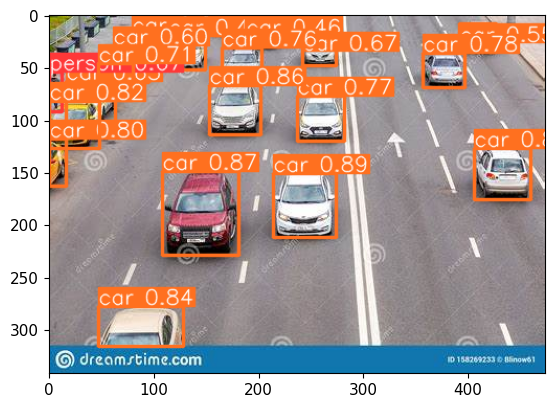

In [23]:
#To render the results with matplotlib 
#To use matplotlib lib as in line 
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

Making base line detection with video - Using system camera or video file

In [36]:
# Define desired window size
desired_width = 640
desired_height = 480

# Define window name
window_name = 'Driver Drowsiness Detection - Pytorch'

# Open the video capture (replace with your video source)
cap = cv2.VideoCapture('TestVideo_2.mp4')  # Or use cap = cv2.VideoCapture(0) for webcam

while cap.isOpened():
    ret, frame = cap.read()

    if not ret:  # Handle frame read errors
        print("Error reading frame.")
        break

    # Make detections (replace with your YOLOv5 detection code)
    results = model(frame)

    # Resize the frame (optional, if you want to resize before detection)
    frame = cv2.resize(frame, (desired_width, desired_height))

    # Render the results (replace with your YOLOv5 rendering code)
    rendered_frame = np.squeeze(results.render())

    # Create or resize the window
    cv2.namedWindow(window_name, cv2.WINDOW_NORMAL)
    cv2.resizeWindow(window_name, desired_width, desired_height)

    # Show the resized frame with detections
    cv2.imshow(window_name, rendered_frame)

    # Handle key press for quitting
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()


Train a Custom Model 

In [37]:
import uuid   # Unique identifier
import os
import time

To Capture the Data with the cam module! - need to make this a separate file

In [43]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['normal','drowsy','using_mobile']
number_imgs = 20

In [45]:
cap = cv2.VideoCapture(0)
for label in labels:
    print(label)
    print('Collecting images for {}'.format(label))
    time.sleep(5)

    # Loop through image range
    for img_num in range(number_imgs):
        print("Collecting images for {}, image number {}".format(label, img_num))

        # Webcam feed
        ret, frame = cap.read()

        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label + "." + str(uuid.uuid1()) + ".jpg")

        # Writes out image to file
        cv2.imwrite(imgname, frame)

        # Render to the screen
        cv2.imshow("Image Collection", frame)

        # 2 second delay between captures
        time.sleep(2)

        if cv2.waitKey(10) & 0xFF == ord("q"):
            break
cap.release()
cv2.destroyAllWindows()


normal
drowsy
using_mobile
